In [2]:
#environment set-up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [3]:
#data collection
raw_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
raw_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
936738,2021-01-16,Sweetwater,Wyoming,56037.0,3280,26.0
936739,2021-01-16,Teton,Wyoming,56039.0,2614,4.0
936740,2021-01-16,Uinta,Wyoming,56041.0,1813,9.0
936741,2021-01-16,Washakie,Wyoming,56043.0,841,23.0


In [4]:
#extracted last 31 days of data available for NYC county
#dropped fips column since there is no specific fips associated with nyc
nyc_df = raw_df[raw_df['county'] == 'New York City'].copy().tail(31)
nyc_df.drop(['fips'],inplace=True,axis=1)
nyc_df

,date,county,state,cases,deaths
838014,2020-12-17,New York City,New York,373320,24613.0
841259,2020-12-18,New York City,New York,377728,24652.0
844505,2020-12-19,New York City,New York,381067,24677.0
847750,2020-12-20,New York City,New York,383808,24697.0
850995,2020-12-21,New York City,New York,387595,24735.0
854240,2020-12-22,New York City,New York,391634,24768.0
857485,2020-12-23,New York City,New York,395810,24790.0
860730,2020-12-24,New York City,New York,401251,24842.0
863975,2020-12-25,New York City,New York,405857,24889.0
867220,2020-12-26,New York City,New York,410048,24931.0


In [5]:
#added a new column that calculates the number of new cases
nyc_df['# of new cases'] = nyc_df['cases'].diff()
nyc_df['# of new deaths'] = nyc_df['deaths'].diff()
nyc_df

,date,county,state,cases,deaths,# of new cases,# of new deaths
838014,2020-12-17,New York City,New York,373320,24613.0,NaN,NaN
841259,2020-12-18,New York City,New York,377728,24652.0,4408.0,39.0
844505,2020-12-19,New York City,New York,381067,24677.0,3339.0,25.0
847750,2020-12-20,New York City,New York,383808,24697.0,2741.0,20.0
850995,2020-12-21,New York City,New York,387595,24735.0,3787.0,38.0
854240,2020-12-22,New York City,New York,391634,24768.0,4039.0,33.0
857485,2020-12-23,New York City,New York,395810,24790.0,4176.0,22.0
860730,2020-12-24,New York City,New York,401251,24842.0,5441.0,52.0
863975,2020-12-25,New York City,New York,405857,24889.0,4606.0,47.0
867220,2020-12-26,New York City,New York,410048,24931.0,4191.0,42.0


In [6]:
nyc_df.describe()

,cases,deaths,# of new cases,# of new deaths
count,31.000000,31.000000,30.000000,30.000000
mean,441034.419355,25199.741935,5030.366667,45.233333
std,45754.392719,398.830538,1209.746981,16.514744
min,373320.000000,24613.000000,2741.000000,20.000000
25%,403554.000000,24865.500000,4179.750000,35.500000
50%,436692.000000,25186.000000,5071.500000,42.500000
75%,477809.000000,25479.000000,5933.000000,52.750000
max,524231.000000,25970.000000,7252.000000,93.000000


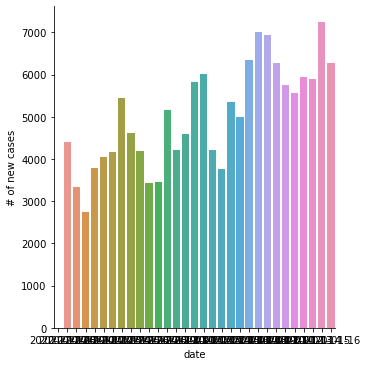

In [7]:
#this graph shows the daily number of new cases for the last 30 days of New York City
sns.catplot(data=nyc_df, kind="bar", x="date",y="# of new cases")

Some findings about COVID19 based on the last 30 days of the dataframe:

The average number of new cases in New York City is 4,784.

The average number of new deaths in New York City is 42.

The lowest number of new cases in a day is 2,741. This was on Dec 20,2020.

The lowest number of new deaths in a day is 17. This was on Dec 16, 2020.

The highest number of new cases in a day is 7,012. This was on Jan 8, 2021.

The highest number of deaths in a day is 93. This was on Jan 14, 2021.

The total number of cases in New York City as of Jan 14 is 510,711.

The toal number of deaths in New York City as of Jan 14 is 25,834.

In [24]:
#Westchester, New York State dataframe
nys_df = raw_df[raw_df['state'] == 'New York'].copy()
nys_df.drop(['fips'],inplace=True,axis=1)
nys_county_df = nys_df[nys_df['county'] == 'Westchester']
nys_county_df

,date,county,state,cases,deaths
519,2020-03-04,Westchester,New York,9,0.0
566,2020-03-05,Westchester,New York,17,0.0
629,2020-03-06,Westchester,New York,33,0.0
718,2020-03-07,Westchester,New York,69,0.0
825,2020-03-08,Westchester,New York,81,0.0
...,...,...,...,...,...
922417,2021-01-12,Westchester,New York,79405,1744.0
925663,2021-01-13,Westchester,New York,80145,1750.0
928908,2021-01-14,Westchester,New York,80868,1763.0
932153,2021-01-15,Westchester,New York,81981,1774.0


In [21]:
#Pinal, Arizona dataframe
az_df = raw_df[raw_df['state'] == 'Arizona'].copy()
az_df.drop(['fips'],inplace=True,axis=1)
az_county_df = az_df[az_df['county'] == 'Pinal']
az_county_df

,date,county,state,cases,deaths
582,2020-03-06,Pinal,Arizona,1,0.0
656,2020-03-07,Pinal,Arizona,3,0.0
751,2020-03-08,Pinal,Arizona,3,0.0
865,2020-03-09,Pinal,Arizona,3,0.0
997,2020-03-10,Pinal,Arizona,3,0.0
...,...,...,...,...,...
920623,2021-01-12,Pinal,Arizona,34653,447.0
923868,2021-01-13,Pinal,Arizona,35041,461.0
927114,2021-01-14,Pinal,Arizona,35550,476.0
930359,2021-01-15,Pinal,Arizona,36122,478.0


In [23]:
#Bennington, Vermont dataframe
vt_df = raw_df[raw_df['state'] == 'Vermont'].copy()
vt_df.drop(['fips'],inplace=True,axis=1)
vt_county_df = vt_df[vt_df['county'] == 'Bennington']
vt_county_df

,date,county,state,cases,deaths
738,2020-03-07,Bennington,Vermont,1,0.0
850,2020-03-08,Bennington,Vermont,1,0.0
980,2020-03-09,Bennington,Vermont,1,0.0
1142,2020-03-10,Bennington,Vermont,1,0.0
1339,2020-03-11,Bennington,Vermont,1,0.0
...,...,...,...,...,...
923423,2021-01-12,Bennington,Vermont,656,3.0
926669,2021-01-13,Bennington,Vermont,666,3.0
929914,2021-01-14,Bennington,Vermont,697,3.0
933159,2021-01-15,Bennington,Vermont,721,3.0


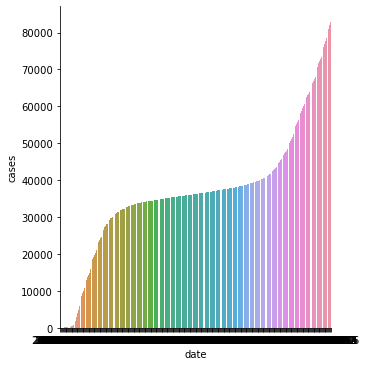

In [35]:
sns.catplot(data=nys_county_df, kind="bar", x="date",y="cases")

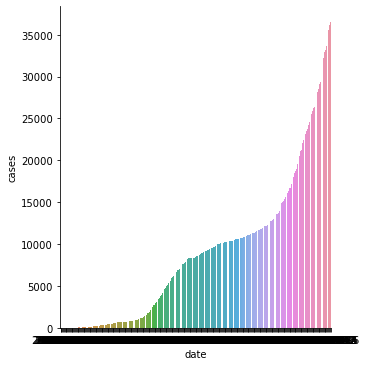

In [36]:
sns.catplot(data=az_county_df, kind="bar", x="date",y="cases")

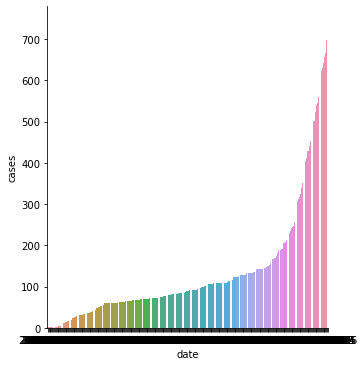

In [37]:
sns.catplot(data=vt_county_df, kind="bar", x="date",y="cases")

Comparative Data Analysis:

Bennington, VT has the lowest number of cases among the three states graphed above.
Bennington, VT has 742 total number of cases.
    
Westchester, NY has the highest number of cases among the three states graphed above.
Westchester, NY has 82,932 total number of cases.
    
All 3 states have a huge spike in number of cases toward the end of the year after the holiday season
    